# ML HW 4
## By: Niral Shah 
### 02/28/18

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import cvxopt
from cvxopt import matrix

## Problem 1: 

**a.**)  $K(x,z)=aK_1(x,z)$ : **No,This is only a kernel if a>0**. As this mapping would equal: $<\sqrt{a}\phi{x}, \sqrt{a}\phi{z} >$. As a result the mapping would not exist in the real space if a$<$ 0. Otherwise for all a$>$0, then this kernel satisifies the properties of an inner product (symmetry, bilinearity, and strict PSD) and would be a kernel. 


**b.**)   $K(x,z)=<x,z>^3+(<x,z>-1)^2$ : **No, This is not a kernel** : 

$ K(x,z) = <x,z>^3 + (<x,z> -1)^2 \\ 
         = (x^{T}z)^3 + (x^{T}z-1)^2 \\
         = \sum\limits_{i=1}^n\sum\limits_{j=1}^n\sum\limits_{k=1}^n x^{(i)}x^{(j)}x^{(k)}z^{(i)}z^{(j)}z^{(k)}+ \sum\limits_{i=1}^n(x^{(i)}z^{(i)}-1)\sum\limits_{j=1}^n(x^{(j)}z^{(j)}-1) \\ $
      
      
**Simplify Second Term:**

$\sum\limits_{i=1}^n(x^{(i)}z^{(i)}-1)\sum\limits_{j=1}^n(x^{(j)}z^{(j)}-1) \\ $

$ = \sum\limits_{i=1}^n\sum\limits_{j=1}^n x^{(i)}x^{(j)}z^{(i)}z^{(j)} - 
2\sum\limits_{i=1}^nx^{(i)}z^{(i)} +1 \\ $

** This term is problematic: **

$2\sum\limits_{i=1}^nx^{(i)}z^{(i)} +1 \\ 
    = <\sqrt{-2}x^i, \sqrt{-2}z^i> 
$

By the properties of a kernel the linear combination of several kernels results in another kernel as long as the coefficients are greater than 0. However since in this case one of the terms reduces to a feature mapping that is not a kernel (due to the $\sqrt{-2}$ term), the equation is not a kernel. 

**c.**)  $K(x,z)=<x,z>^2+\exp(-\|x\|^2)\exp(-\|z\|^2)$: **Yes, This is a kernel** 

Using the properties of a kernel: 
Since $<x,z>^2$ is a valid kernel, and $exp(k(x,z))$ is also a kernel along with property 2 that the product of two kernels (in this case $\exp(-\|x\|^2)\exp(-\|z\|^2$ ) is also a kernel. This simplifies down the property 1 where the linear combination of valid kernels results in a valid kernel. 

## Problem 2: 

In order for kenel k to be a RKHS it must satisfy two property namely: 
* $f(x) = < f(\cdot), k(\cdot,x) >_{H_k} $
* k spans the hilbert space $H$ for all X 

** Using Mercer's Theorem we can find such a space with an inner product defined as:** 

** $ < f(x), k(x,y) >_{H_k} = 3\int_{f=0}^{1}k(x,y)f(y)dy $ **

* Let's prove it satisifies the first property: 
For $f(x) = ax$ and $K(x,y) = xy$ 

If its a reproducible kernel: 

f(x) $ \stackrel{?}{=}$ $3\int_{f=0,}^{1}k(x,y)f(y)dy$ 

$ = 3\int_{f=0}^{1}(ay)(xy)dy \\ 
= 3\int_{f=0}^{1}(ax)(y^2)dy \\ 
= 3ax\frac{y^3}{3}|_{0}^{1} \\
= ax \\
= f(x) \\
f(x) \stackrel{\checkmark}{=} f(x)$
Thus it is reproducible. 

** So for the space defined by the inner product: ** 

$ < f(x), k(x,y) >_{H_k} = 3\int_{f=0}^{1}k(x,y)f(y)dy $ 

** it is a reproducible kernel** 

However, we also need to check the space is complete and k spans the hilbert space. 

If the space is complete then the norm of $ \sqrt{|| f(x) ||} = \sqrt{<f(x), f(x) >^2}  \in\mathbb{R} $ : 

**Proof it is complete:**

$\sqrt{<f(x), f(x) >^2}$

$ =\sqrt{ 3\int_{f=0}^{1}(ax)(ax)dy} \\ 
= \sqrt{3\int_{f=0}^{1}(a^2)(x^2)dy }\\ 
= \sqrt{3a^2\frac{x^3}{3}|_{0}^{1} }\\
= \sqrt{a^2} \\ 
= a $ 

Since a $\in\mathbb{R}$, the space is a complete and positive definite. 

Finally, we can say $K(x,y)$ spans the hilbert space for: $span\{k(\cdot,x) : x \in \mathbb{X}\} $

**Summary:**

Collectively this means for a space defined by an inner product: ** $ < f(x), k(x,y) >_{H_k} = 3\int_{f=0}^{1}k(x,y)f(y)dy $ **, kernel K is RKHS for a set of functions f, f(x) = ax. 

## Problem 3: 

### Problem 3a: 

#### What is the Langrangian function:

$\mathcal{L}(y,w,\epsilon, \eta, \eta^*, \alpha, \alpha^*, \beta, \beta^* ) = \frac{1}{2}||w||^2+ C\sum\limits_{i=1}^{n} (\eta_{i} + \eta_{i}^*) + \sum\limits_{i=1}^{n}\alpha_{i}[y_i -<w,x_i> - \epsilon - \eta_{i}]+\sum\limits_{i=1}^{n}\alpha^*_{i}[<w,x_i>-y_i - \epsilon - \eta^*_{i}] + \sum\limits_{i=1}^{n}\beta_i(-\eta_i) + \sum\limits_{i=1}^{n}\beta^*_i(-\eta^*_i) $

Subject to constraints of primal feasability: 
$\alpha_i,\alpha^*_i, \beta_i, \beta_i^* \geq 0 $

#### Find the Dual Form: 

Use the Lagrangian Stationary to simplify the primal form: 

* (1) $\triangledown_{w}\mathcal{L} = w - \sum\limits_{i=1}^n \alpha_ix_i + \sum\limits_{i=1}^n \alpha^*_ix_i = 0$  
    * $w = -\sum\limits_{i=1}^n \alpha_ix_i + \sum\limits_{i=1}^n \alpha^*_ix_i$
    
    

* (2) $\triangledown_{\eta}\mathcal{L} = C - \sum\limits_{i=1}^n \alpha_i - \sum\limits_{i=1}^n \beta_i = 0$ 
     * $ C = \sum\limits_{i=1}^n \alpha_i + \sum\limits_{i=1}^n \beta_i $


* (3) $\triangledown_{\eta^*}\mathcal{L} = C - \sum\limits_{i=1}^n \alpha^*_i - \sum\limits_{i=1}^n \beta^*_i = 0$
    * $ C = \sum\limits_{i=1}^n \alpha^*_i + \sum\limits_{i=1}^n \beta^*_i $

Note the above also suggests that: 
$ C - \alpha_i = \beta_i \geq 0 \\
\rightarrow C \geq \alpha_i \\
\rightarrow C \geq \alpha^*_i$

Now substituting equations 2 ($\triangledown_{\eta}\mathcal{L}$)  and 3 ($\triangledown_{\eta^*}\mathcal{L}$)  for the values of C we can ** eliminate**  $\eta$ and $\eta*$ and along with it, $\beta$ and $\beta^*$ cancel out. (This simplification is not shown as it is trivial). The resulting equation is:

$ = \frac{1}{2} ||w||^2 + \sum\limits_{i=1}^n y_i(\alpha_i-\alpha^*_i) -\sum\limits_{i=1}^n (<w,x_i>)(\alpha_i-\alpha^*_i) + \sum\limits_{i=1}^n\epsilon(\alpha_i-\alpha^*_i) $


Now plug in equation 1 ($\triangledown_{w}\mathcal{L}$):

$= -\frac{1}{2} \sum\limits_{i=1}^n\sum\limits_{j=1}^n(\alpha_i-\alpha^*_i)(\alpha_j-\alpha^*_j)<x_i,x_j> + \sum\limits_{i=1}^n y_i(\alpha_i-\alpha^*_i) - \sum\limits_{i=1}^n\epsilon(\alpha_i-\alpha^*_i) $

Thus this simplfies it into the dual form langrangian: 

$\mathcal{L}(\alpha, \alpha^*) = -\frac{1}{2} \sum\limits_{i=1}^n\sum\limits_{j=1}^n(\alpha_i-\alpha^*_i)(\alpha_j-\alpha^*_j)<x_i,x_j> + \sum\limits_{i=1}^n y_i(\alpha_i-\alpha^*_i) - \sum\limits_{i=1}^n\epsilon(\alpha_i-\alpha^*_i) $

** More generally the dual problem is: ** 

$\max -\frac{1}{2} \sum\limits_{i=1}^n\sum\limits_{j=1}^n(\alpha_i-\alpha^*_i)(\alpha_j-\alpha^*_j)<x_i,x_j> + \sum\limits_{i=1}^n y_i(\alpha_i-\alpha^*_i) - \sum\limits_{i=1}^n\epsilon(\alpha_i-\alpha^*_i) $

Subject to dual feasability constraints: 
$ 0 \leq \alpha, \alpha* \leq C $

### Problem 3b.  

The support vectors are defined using the ** complementary slackness conditions ** : 
* $\alpha_{i}[y_i -<w,x_i> - \epsilon - \eta_{i}] = 0 $ 
* $\alpha^*_{i}[<w,x_i>-y_i - \epsilon - \eta^*_{i}] = 0 $
* $\beta_i(\eta_i) = 0$
* $\beta^*_i(\eta^*_i) = 0$


Recall:

** Dual Feasability Condtions: **
* $ \alpha, \alpha*, \beta, \beta^* \geq 0 $

** Primal Feasability Conditions ** 
* $ y_i -<w,x_i> - \epsilon - \eta_{i} \leq 0 $
* $<w,x_i>-y_i - \epsilon - \eta^*_{i} \leq 0 $


#### Support Vectors:

* If $\alpha_i > 0 $ $\checkmark$ - Possible Condition
    * $y_i - w^Tx_i - \epsilon - \eta_i = 0 $
    
    
* If $\alpha^*_i > 0 $ $\checkmark$ - Possible Condition
    * $ <w,x_i>-y_i - \epsilon - \eta^*_{i}$= 0 $


* If $y_i - w^Tx_i - \epsilon - \eta_i < 0 $ $\checkmark$ - Possible Condition
    * $\alpha_i =  0 $
    

* If $ <w,x_i>-y_i - \epsilon - \eta^*_{i}  < 0 $ $\checkmark$ - Possible Condition
    * $\alpha^*_i= 0 $
    
    
* If $\beta_i > 0 $ $\checkmark$ - Possible Condition
    * $\eta_i = 0$ 
    
    
* If $\beta^*_i > 0 $ $\checkmark$ - Possible Condition
    * $\eta^*_i = 0$ 


### Problem 3c : 
How does $\epsilon$ effect the complexity of the model?

Looking at the Loss function: 

$L(x,y,f)=\max(0,|y-f(x)|-\epsilon)$ 

It's evident that $\epsilon$ reduces the margin. Thus for smaller values of $\epsilon$ it will approach a problem similar to a hard-margin SVM where it seeks to maximize the margin (rather than accepting penalties) since the potential loss will be higher. So overall it is more likely to overfit if $\epsilon$ is smaller (more complex), while the opposite occur


### Problem 3d: 
How does C effect the complexity of the model? 

C is the amount we penalize errors, so for lower C's it leads to a complex solution and will avoid overfitting. While larger values will increase loss and encourage overfitting. 


### Problem 3e: 
How to predict a new unseen sample x? 

Since $ f(x) = <w,x> $ we can substitute w using the value solved using $\triangledown_{w}\mathcal{L} \rightarrow w = -\sum\limits_{i=1}^n \alpha_ix_i + \sum\limits_{i=1}^n \alpha^*_ix_i$

Thus: $ f(x)$ can be rewritten as $f(x)=\sum\limits_{i=1}^n(\alpha_i-\alpha^*_i)<x_i,x>$




## Problem 4a:

In [358]:
# Generate a synthetic dataset
# adapted from sci-kit learn documentation: 
def generate_fake_data():
    mu_1 = np.ones((2,))
    mu_2 = 3*np.ones((2,))
    C1 = np.diag(0.3*np.ones((2,)))
    C2 = np.diag(0.1*np.ones((2,)))
    
    x1 =np.random.multivariate_normal(mu_1,C1,50)
    y1 = np.ones((x1.shape[0]))
    
    x2 =np.random.multivariate_normal(mu_2,C2,50)
    y2 = -1*np.ones((x2.shape[0]))
    return (x1,x2,y1,y2)

In [359]:
x1,x2,y1,y2 = generate_fake_data()

In [360]:
fig,ax = plt.subplots()
ax.scatter(x1[:,0],x1[:,1], c='red', label='1')
ax.scatter(x2[:,0],x2[:,1],c='blue', label='-1')

In [361]:
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

In [362]:
#cvxopt solves min 1/2 x'Px+q'x

#minimizing min 1/2 a^T * K* a  1^T * a 
# st: a >0 for all i
# and y^T*a = 0

def get_lagrange_multipliers(x,y):
    K=y[:,None]*x
    K = np.dot(K,K.T)
    P = matrix(K)
    q = matrix(-np.ones((x.shape[0],1)))
    G = matrix(-np.eye(x.shape[0]))
    h = matrix(np.zeros(x.shape[0])) #
    A = y.reshape(1,-1)
    A = A.astype(float)
    A = matrix(A) # y' 
    b = matrix(np.zeros(1))
    sol = cvxopt.solvers.qp(P,q,G,h,A,b)
    alpha = np.array(sol['x'])
    return alpha

In [363]:
alpha = get_lagrange_multipliers(x,y)

     pcost       dcost       gap    pres   dres
 0: -9.8393e+00 -1.8280e+01  3e+02  2e+01  2e+00
 1: -8.7212e+00 -5.5942e+00  6e+01  3e+00  4e-01
 2: -7.1345e-01 -2.2902e+00  4e+00  1e-01  2e-02
 3: -8.6559e-01 -1.4524e+00  9e-01  2e-02  3e-03
 4: -1.0707e+00 -1.4950e+00  5e-01  2e-03  2e-04
 5: -1.3795e+00 -1.3988e+00  2e-02  9e-05  1e-05
 6: -1.3934e+00 -1.3939e+00  6e-04  2e-06  2e-07
 7: -1.3937e+00 -1.3938e+00  3e-05  2e-08  2e-09
 8: -1.3937e+00 -1.3937e+00  6e-07  2e-10  2e-11
Optimal solution found.


In [364]:
def train(alpha,x): #train function
    w = np.sum(alpha*y[:,None]*x, axis=0)
    cond = (alpha > 1e-4).reshape(-1) # get support vectors
    b = y[cond] - np.dot(x[cond], w)
    bias = b[0]
    slope = -w[0] / w[1]
    intercept = -bias / w[1]
    return slope,intercept,w

In [365]:
m, b,w = train(alpha,x)

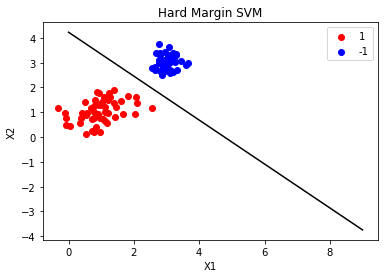

In [366]:
xa = np.arange(0,10)
ax.plot(xa, xa * m + b, 'k-')
legend = ax.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hard Margin SVM')
plt.show()

In [367]:
xtest = [6,4] #point (6,4) is on -1 side of the boundary
def predict(x,w,b):
    return np.sign(np.matmul(np.transpose(w), xtest) + b )

In [368]:
predict(xtest,w,b) # returns predicted label (in this case matches up correctly)

-1.0

## Problem 4b

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('creditCard.csv')

In [4]:
y = np.array(df['Class'])

In [5]:
df = df.drop(['Class'],axis=1)

In [6]:
x = df.as_matrix()

In [7]:
x_norm = x-x.mean(axis=0)
x_norm /=x_norm.std(axis=0)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y,
                                                    test_size=0.1,
                                                    random_state=2018)

In [10]:
# for train_indx, test_indx in kf.split(x_norm):
#     x_train, x_test = x_norm[train_indx], x_norm[test_indx]
#     y_train, y_test = y[train_indx], y[test_indx]

In [11]:
from sklearn import svm
from sklearn import metrics

In [15]:
clf = svm.SVC(kernel='linear',probability = True)
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)

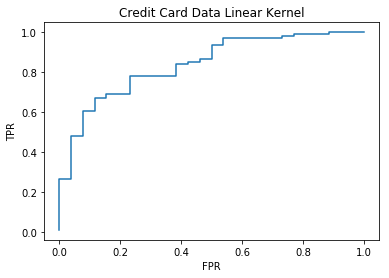

In [19]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Credit Card Data Linear Kernel')
plt.show()

In [20]:
print ("Accuracy: %0.2f" % (metrics.accuracy_score(y_test,clf.predict(x_test))))

Accuracy: 0.85


In [21]:
metrics.auc(fpr,tpr)

0.839622641509434

## Problem 4c

In [22]:
# sigma^2 =5

In [33]:
sigma2 = 5
gamma = 1/float(sigma2)

In [34]:
clf = svm.SVC(kernel='rbf',gamma=gamma,probability=True)
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

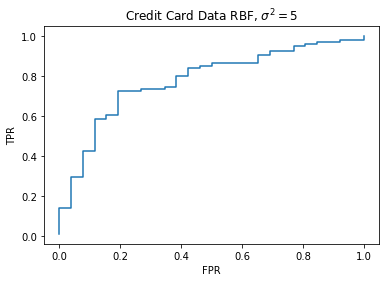

In [35]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Credit Card Data RBF, $\sigma^2 =5$')
plt.show()

In [36]:
print ("Accuracy: %0.2f" % (metrics.accuracy_score(y_test,clf.predict(x_test))))

Accuracy: 0.80


In [37]:
metrics.auc(fpr,tpr)

0.7790275761973875

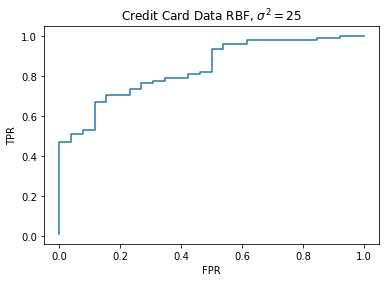

In [38]:
# sigma^2 = 25
sigma2 = 25
gamma = 1/float(sigma2)
clf = svm.SVC(kernel='rbf',gamma=gamma,probability=True)
clf.fit(x_train,y_train)
fpr,tpr,thresholds = metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Credit Card Data RBF, $\sigma^2 =25$')
plt.plot(fpr,tpr)
plt.show()

In [39]:
print ("Accuracy: %0.2f" % (metrics.accuracy_score(y_test,clf.predict(x_test))))

Accuracy: 0.85


In [40]:
metrics.auc(fpr,tpr)

0.8388969521044993